# School inspection reports' analysis

This code, which uses SoS as the background, is written in Python (for the data extraction and manipulation) and R (for the Topic analysis). The respective sections can be extracted and used separetely, or jointly by following the installation guidelines presented in the link below.

https://vatlab.github.io/sos-docs/running.html#Local-installation

The user should run the following lines from the Command Prompt

- pip install sos-notebook
- pip install sos-papermill
- pip install sos-r
- python -m sos_notebook.install
- jupyter kernelspec list

and choose SoS as the kernel for a new notebook. Please refer to Notebook Interface of the SoS documentation for details (https://vatlab.github.io/sos-docs/doc/documentation/Notebook_Interface.html)

Data from Ireland taken from https://data.gov.ie/dataset/primary-schools and https://www.education.ie/en/Publications/Inspection-Reports-Publications/Whole-School-Evaluation-Reports-List


In [1]:
#!pip install rpy2
#!pip install wget
#!pip install pdfminer.six
#!pip install geopandas
#!pip install geopy
#!pip install bs4
#!pip install pandas

# We import the necessary packages
import sys, os, csv, requests, re, bs4, datetime, time, threading, wget, pdfminer, geopandas, geopy
import pandas as pd
import matplotlib.pyplot as plt
from pdfminer.high_level import extract_text
from geopy.geocoders import Nominatim
import numpy as np

Select the appropriate working directory

In [2]:
os.chdir("C:\\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298\WorkFiles_Inspection\Ireland")  # REMOVE
if os.getcwd()!="C:\\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298\WorkFiles_Inspection\Ireland":
    print("Please insert the WORKING DIRECTORY")                                                            # We create a loop so that the user establishes the working directory
    print("Remember to separate the backslash (for Windows) or forward slash (in Mac)") 
    while True:                                                                             
        NewPath=input()                                                                                     # The user inserts the working directory
        if os.path.exists(NewPath)==True:                                                                   # If the program exists, the working directory will be updated
            os.chdir(NewPath)                                                               
            print("Your new path is " + os.getcwd())                                        
            break                                                                                           # If the condition is met, the program keeps running
        else:                                                                                               # If the condition is not met, the program requests the user to
            print("Please check if the path is correctly written")                                          # insert a new path and the condition is checked again
        continue
else: 
    print("Your path is " + os.getcwd())

Your path is C:\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298\WorkFiles_Inspection\Ireland


## Extracting the tables from the webpage and turning them into a DataFrame

Note that his DataFrame will not only work to later download the corresponding reports, but it is a useful Metadata database, which can be then used to make analyses on the different results across time, location, or type of school. 

In [3]:
WebpageRoot = "https://www.education.ie/en/Publications/Inspection-Reports-Publications/Whole-School-Evaluation-Reports-List/?pageNumber="
General_InspectionReports = pd.DataFrame(columns=['Date','School Roll No.','County','School Name','School Level','Inspection Type','Subject','URL'])

print("How many pages would you like to download?")
NumberPages = input()

for x in range(1,NumberPages):
    IrelandWebpage = requests.get(WebpageRoot + str(x))
    CleanIrelandWebpage = bs4.BeautifulSoup(IrelandWebpage.text, "lxml")
    InspectionReports = {}
    ID = 0
    Table = CleanIrelandWebpage.find('table', id="IRList")
    for p in Table.find_all('tr'):
        if ID == 0:
            ID = ID + 1
            continue
        else:
            Date = p('td')[0].string[:2] + '_' + p('td')[0].string[3:5] + '_' + p('td')[0].string[6:]
            SchoolRoll = p('td')[1].string
            County = p('td')[2].string
            SchoolName = p('td')[3].string
            SchoolLevel = p('td')[4].string
            InspectionType = p('td')[5].string
            Subject = p('td')[6].string
            URL = p('td')[7]('a')[0].attrs['href'][86:]
            InspectionReports[ID] = {'Date': Date, 'School Roll No.': SchoolRoll, 'County': County, 'School Name': SchoolName, 'School Level': SchoolLevel, 'Inspection Type': InspectionType, 'Subject': Subject, 'URL': URL}
            ID = ID + 1

    df_InspectionReports = pd.DataFrame.from_dict(InspectionReports, orient='index')
    General_InspectionReports = pd.concat([General_InspectionReports,df_InspectionReports]) 


## Downloading the PDFs

In [4]:
PDFToConvert = []
for index, row in General_InspectionReports.iterrows():
    DownloadURL = 'https://www.education.ie/en/Publications/Inspection-Reports-Publications/Whole-School-Evaluation-Reports-List/' + row['URL']
    FileName = 'Reports\\' + row['School Roll No.'] + '_' + row['Date'] + '.pdf'
    PDFToConvert.append('Reports\\' + row['School Roll No.'] + '_' + row['Date'])
    print('Report ' + row['School Roll No.'] + ' downloaded')
    wget.download(DownloadURL, FileName)

Report 64220A downloaded
100% [............................................................................] 514934 / 514934Report 64370T downloaded
100% [............................................................................] 516259 / 516259Report 65190W downloaded
100% [............................................................................] 441971 / 441971Report 18660S downloaded
100% [............................................................................] 631292 / 631292Report 70640I downloaded
100% [............................................................................] 656903 / 656903Report 20313J downloaded
100% [............................................................................] 525297 / 525297Report 20435A downloaded
100% [............................................................................] 648636 / 648636Report 17893N downloaded
100% [............................................................................] 496101 / 496101Report 6

## Converting the PDFs to text and cleaning them from unusefull content

Report 64220A_04_11_2020 properly processed
Report 64370T_23_10_2020 properly processed
Report 65190W_22_10_2020 properly processed
Report 18660S_21_10_2020 properly processed
Report 70640I_21_10_2020 properly processed
Report 20313J_20_10_2020 properly processed
Report 20435A_20_10_2020 properly processed
Report 17893N_16_10_2020 properly processed
Report 65100S_16_10_2020 properly processed
Report 70081V_15_10_2020 properly processed
Report 60321J_14_10_2020 properly processed
Report 20220C_13_10_2020 properly processed
Report 20073P_13_10_2020 properly processed
Report 62990Q_13_10_2020 properly processed
Report 01300Q_08_10_2020 properly processed
Report 05933G_08_10_2020 properly processed
Report 16485Q_08_10_2020 properly processed
Report 64760J_08_10_2020 properly processed
Report 19985F_06_10_2020 properly processed
Report 19507P_02_10_2020 properly processed
Report 20422O_29_09_2020 properly processed
Report 18062V_25_09_2020 properly processed
Report 60030V_24_09_2020 properl

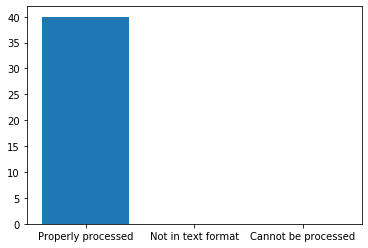

In [5]:
ConvertionCategories = {"Properly processed":0, "Not in text format":0, "Cannot be processed":0}
FilesProperlyConverted = {}
FilesNotConverted = []
def find_2nd(string, substring):
    return string.find(substring, string.find(substring) + 1)
for PDF in PDFToConvert:
    try: 
        Text = extract_text(PDF + '.pdf')
        if len(Text)==0:
            ConvertionCategories["Not in text format"] = ConvertionCategories["Not in text format"] + 1
            print(PDF + ' is not in text format')
        else:
            ConvertionCategories["Properly processed"] = ConvertionCategories["Properly processed"] + 1
            Option1 = Text.find('WHOLE-SCHOOL EVALUATION – MANAGEMENT, LEADERSHIP AND LEARNING   Dates of inspection')
            if Option1 != -1:
                Text = Text[Option1:]
            Option2 = Text.find('WHOLE-SCHOOL EVALUATION – MANAGEMENT, LEADERSHIP AND LEARNING    Date of inspection')
            if Option2 != -1:
                Text = Text[Option2:]
            Option3 = Text.find('WHOLE-SCHOOL EVALUATION – MANAGEMENT, LEADERSHIP AND LEARNING  Dates of inspection')
            if Option3 != -1:
                Text = Text[Option3:]
            Option4 = Text.find('WHOLE-SCHOOL EVALUATION – MANAGEMENT, LEADERSHIP AND LEARNING Dates of inspection')
            if Option4 != -1:
                Text = Text[Option4:]
            Option5 = Text.find('Whole-School Evaluation – Management, Leadership and Learning Dates of inspection')
            if Option5 != -1:
                Text = Text[Option5:]
            Option6 = Text.find('Whole-School Evaluation Date of inspection')
            if Option6 != -1:
                Text = Text[Option6:]
            if Text.find('An Roinn') == 1:
                Text = Text[find_2nd(Text, 'Dates of inspection'):]
            Option7 = Text.find('THE INSPECTORATE’S QUALITY CONTINUUM')
            if Option7 != -1:
                Text = Text[:Option7 - 1]
            Option8 = Text.find('MEASTÓIREACHT SCOILE UILE – BAINISTÍOCHT, CEANNAIREACHT AGUS FOGHLAIM')
            if Option8 != -1:
                FilesNotConverted.append(PDF[8:])
                print('Report ' + PDF[8:] + ' could not be processed')
                continue
            FilesProperlyConverted[PDF] = {'Text': Text}
            with open("Reports\\Plain text\\" + PDF[8:] + ".txt", "w", errors="ignore") as output:
                output.write(str(Text))
            print('Report ' + PDF[8:] + ' properly processed')
    except (KeyError, UnicodeEncodeError):
        ConvertionCategories["Cannot be processed"] = ConvertionCategories["Cannot be processed"] + 1
        FilesNotConverted.append(PDF[8:])
        print('Report ' + PDF[8:] + ' could not be processed')
        continue

df_FilesProperlyConverted = pd.DataFrame.from_dict(FilesProperlyConverted, orient='index')

plt.bar(*zip(*ConvertionCategories.items()))
#plt.show()

General_InspectionReports['Key'] = General_InspectionReports['School Roll No.'] + '_' + General_InspectionReports['Date']
General_InspectionReports.to_csv(r'Reports\\InspectionReports.csv', index=False)
for p in range(len(FilesNotConverted)):
    General_InspectionReports.drop(General_InspectionReports[General_InspectionReports.Key == FilesNotConverted[p]].index, inplace=True)
General_InspectionReports.to_csv(r'Reports\\InspectionReports2.csv', index=False)

### Most used words


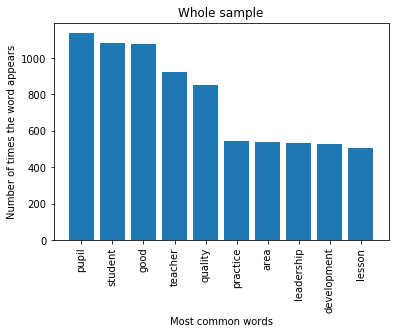

In [19]:
import matplotlib.pyplot as plt
import nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
stopwords = set(nltk.corpus.stopwords.words('english'))

TotalText = []
for index, row in df_FilesProperlyConverted.iterrows():
    text = row['Text']
    TotalText.append(text)

newStopWords = ['school','learning','student','pupil','teacher','management','teaching','support', 'lesson', 'board']
stopwords = stopwords.union(newStopWords)
TotalText = " ".join(TotalText)
tokens = [w for w in word_tokenize(TotalText.lower()) if w.isalpha()]          # isalpha() checks if each word is alphabetical, lower() transforms everything to lowercase
no_stop = [t.strip() for t in tokens if t.strip() not in stopwords]      # stopwords already comes with a built-in list of words to remove
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stop]
bow = Counter(lemmatized)
MostCommon = dict(bow.most_common(10))

plt.bar(*zip(*MostCommon.items()))
plt.title('Whole sample')
plt.xlabel('Most common words')
plt.ylabel('Number of times the word appears')
plt.xticks(rotation='vertical')
plt.savefig("Results\\Word count\\Whole sample.png")
plt.show()


## Topic modelling

In [20]:
install.packages("readtext")
install.packages("stm")
install.packages("tm")
install.packages("SnowballC")
install.packages("igraph")

library(readtext)
library(stm)
library(tm)

package 'readtext' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\g.vargas\AppData\Local\Temp\RtmpgrH6P4\downloaded_packages
package 'stm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\g.vargas\AppData\Local\Temp\RtmpgrH6P4\downloaded_packages
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\g.vargas\AppData\Local\Temp\RtmpgrH6P4\downloaded_packages
package 'SnowballC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\g.vargas\AppData\Local\Temp\RtmpgrH6P4\downloaded_packages
package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\g.vargas\AppData\Local\Temp\RtmpgrH6P4\downloaded_packages


Warning message:
"package 'readtext' was built under R version 4.0.3"
Warning message:
"package 'stm' was built under R version 4.0.3"
stm v1.3.6 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com

Warning message:
"package 'tm' was built under R version 4.0.3"
Loading required package: NLP



In [21]:
setwd("C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\MP_01000298\\WorkFiles_Inspection\\Ireland")
DATA_DIR <- system.file("extdata/", package = "readtext")
ourdata<-readtext("Reports\\Plain text\\*")
# Import additional metadata (year, language, etc.)
metadata <-read.csv("Reports\\InspectionReports.csv")

In [39]:
# Stemming and tokenization
NewStopWords <- c('school','learning','student','pupil', 'pupils','teacher','management','teaching','support', 'lesson', 'board')
processed_data <- textProcessor(ourdata$text,  customstopwords=NewStopWords)

# Prepare Documents For Analysis With Stm
prepared_data <- prepDocuments(processed_data$documents, processed_data$vocab, processed_data$meta)
# Once the prepared_data is ready, open it, see where the metadata is located, and add the information from the ourmetadata

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 1399 of 3505 terms (1399 of 30449 tokens) due to frequency 
Your corpus now has 59 documents, 2106 terms and 29050 tokens.

In [25]:
# STM MODELING
# The number of topics can be automatically determined using searchK (see https://cbail.github.io/SICSS_Topic_Modeling.html)
# max.em.its is how many times the model should run
poliblogPrevFit <- stm(prepared_data$documents, prepared_data$vocab, K=3, max.em.its=30, 
                       data=prepared_data$meta, init.type="Spectral")

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	...
	 Recovering initialization...
 	....................
Initialization complete.
...........................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -6.236) 
...........................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -6.201, relative change = 5.617e-03) 
...........................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -6.198, relative change = 4.295e-04) 
...........................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 4 (approx. per word bound = -6.198, relative change = 5.402e-05) 
...........................................................
Co

In [27]:
png(filename="Results\\Topic modelling\\Two topics word comparison.png", 
    type="cairo",
    units="in", 
    width=10, 
    height=8, 
    pointsize=12, 
    res=300)
plot(poliblogPrevFit, type="perspectives", topics=c(1,2))
dev.off()

png 
  2

In [28]:
png(filename="Results\\Topic modelling\\Topic prevalence.png", 
    type="cairo",
    units="in", 
    width=10, 
    height=8, 
    pointsize=12, 
    res=300)
plot(poliblogPrevFit, type="summary", xlim=c(0,.8))
dev.off()

png 
  2

In [29]:
png(filename="Results\\Topic modelling\\Words from selected topics.png", 
    type="cairo",
    units="in", 
    width=10, 
    height=8, 
    pointsize=12, 
    res=300)
plot(poliblogPrevFit, type="labels", topics=c(1,2,3))
dev.off()

png 
  2

In [30]:
png(filename="Results\\Topic modelling\\Distribution Document Topic Proportions.png", 
    type="cairo",
    units="in", 
    width=10, 
    height=8, 
    pointsize=12, 
    res=300)
plot(poliblogPrevFit, type="hist")
dev.off()

png 
  2

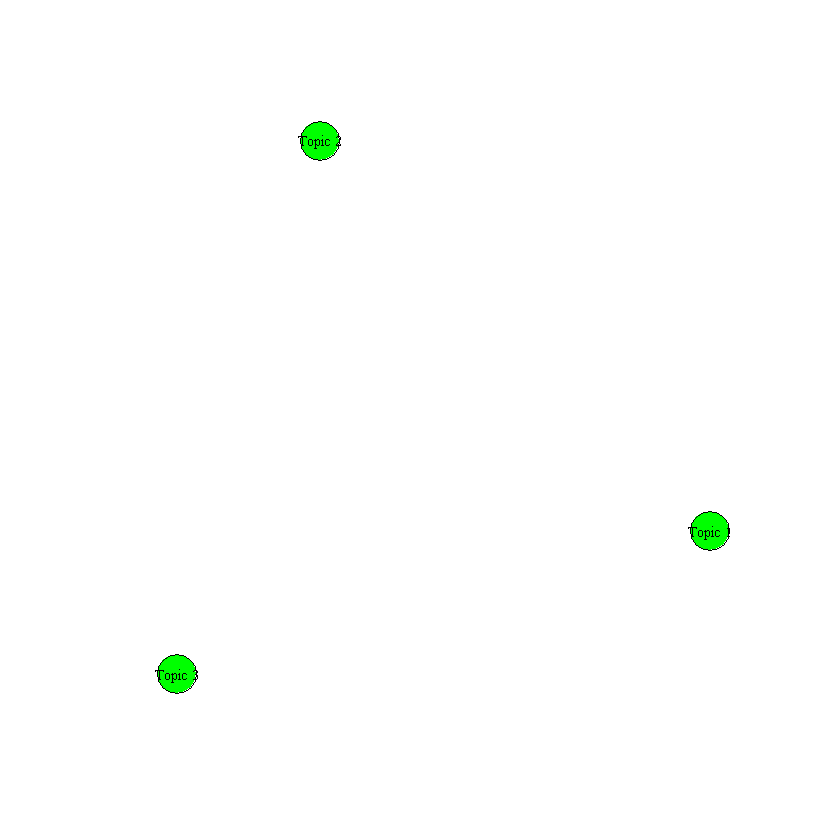

In [31]:
topic_correlation <- topicCorr(poliblogPrevFit, method = c("simple", "huge"), cutoff = 0.01,
                               verbose = TRUE)

plot(topic_correlation, topics = NULL, vlabels = NULL, layout = NULL,
     vertex.color = "green", vertex.label.cex = 0.75,
     vertex.label.color = "black")